<a href="https://colab.research.google.com/github/Carlosdale12/Carlosdale12/blob/main/usd_clp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


Columnas disponibles: MultiIndex([( 'Close', 'CLP=X'),
            (  'High', 'CLP=X'),
            (   'Low', 'CLP=X'),
            (  'Open', 'CLP=X'),
            ('Volume', 'CLP=X')],
           names=['Price', 'Ticker'])

Rentabilidad anual promedio: 0.0572
Volatilidad anual (riesgo): 0.1732


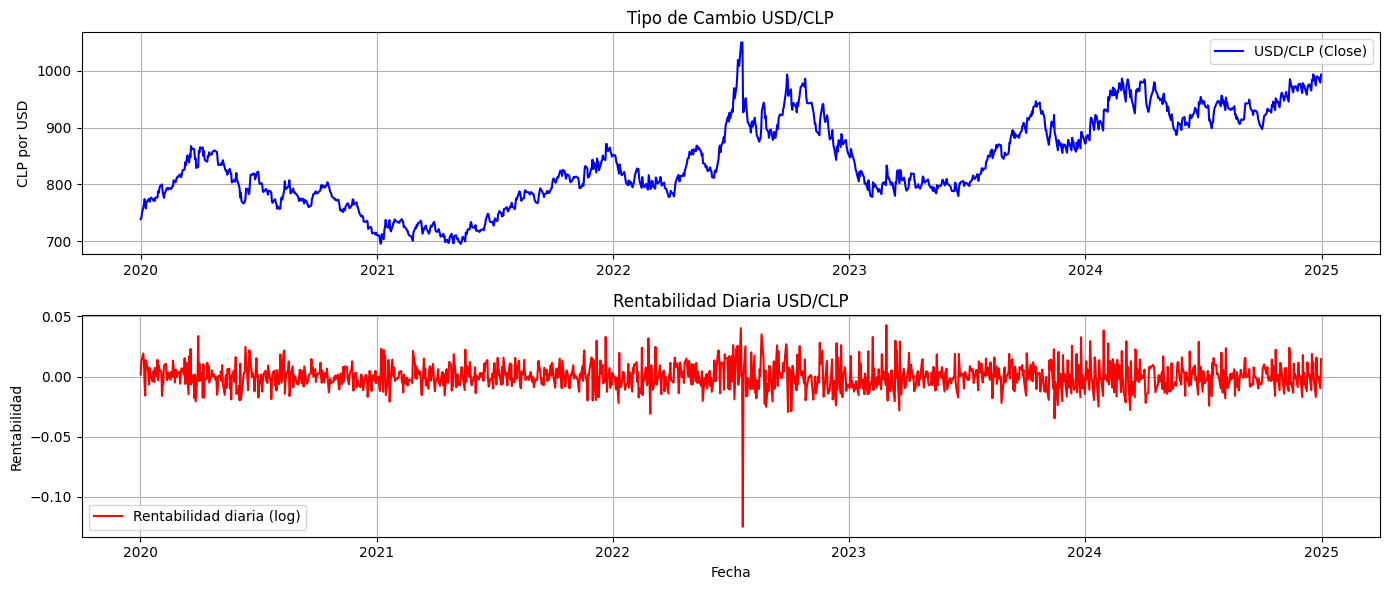

In [6]:
# Instalar yfinance si no está instalado
!pip install yfinance --quiet

# Importar librerías
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Descargar datos del tipo de cambio USD/CLP
moneda = 'CLP=X'
datos = yf.download(moneda, start='2020-01-01', end='2025-01-01')

# Verifica columnas disponibles
print("Columnas disponibles:", datos.columns)

# Usamos 'Close' en lugar de 'Adj Close'
datos['Rentabilidad'] = np.log(datos['Close'] / datos['Close'].shift(1))

# Calcular rentabilidad anualizada y volatilidad anualizada
rentabilidad_promedio = datos['Rentabilidad'].mean() * 252
volatilidad = datos['Rentabilidad'].std() * np.sqrt(252)

print(f"\nRentabilidad anual promedio: {rentabilidad_promedio:.4f}")
print(f"Volatilidad anual (riesgo): {volatilidad:.4f}")

# Graficar resultados
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(datos['Close'], label='USD/CLP (Close)', color='blue')
plt.title('Tipo de Cambio USD/CLP')
plt.ylabel('CLP por USD')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(datos['Rentabilidad'], label='Rentabilidad diaria (log)', color='red')
plt.title('Rentabilidad Diaria USD/CLP')
plt.xlabel('Fecha')
plt.ylabel('Rentabilidad')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
